In [10]:
import torch

pytorch_version = torch.__version__
print(pytorch_version)

import sys

python_version = sys.version
print("Python version:" + python_version)

1.1.0
Python version:3.5.2 (default, Oct  8 2019, 13:06:37) 
[GCC 5.4.0 20160609]


In [13]:
import pkg_resources

def get_package_versions():
    packages = {}
    for package in pkg_resources.working_set:
        packages[package.key] = package.version
    return packages

package_versions = get_package_versions()
print(package_versions)

{'qtconsole': '4.7.7', 'markdown': '3.1.1', 'pyparsing': '2.4.0', 'requests': '2.22.0', 'pandas': '0.24.2', 'pandocfilters': '1.4.3', 'pygments': '2.9.0', 'alembic': '1.4.3', 'importlib-metadata': '2.1.1', 'descent': '0.2.5', 'wheel': '0.33.4', 'qtpy': '1.9.0', 'cycler': '0.10.0', 'keras-applications': '1.0.8', 'tensorboard': '1.14.0', 'pyrsistent': '0.17.3', 'ruamel.yaml': '0.17.4', 'matplotlib': '3.0.3', 'traitlets': '4.3.3', 'entrypoints': '0.3', 'pycparser': '2.20', 'proglog': '0.1.9', 'certipy': '0.1.3', 'pyzmq': '20.0.0', 'idna': '2.8', 'torch': '1.1.0', 'tqdm': '4.32.2', 'oauthlib': '3.1.0', 'decorator': '4.4.0', 'zipp': '1.2.0', 'cffi': '1.14.5', 'pywavelets': '1.0.3', 'moviepy': '1.0.0', 'nbformat': '5.1.3', 'keras': '2.2.4', 'pillow': '6.1.0', 'jedi': '0.17.2', 'toolz': '0.10.0', 'cryptography': '3.2.1', 'multipledispatch': '0.6.0', 'tensorflow-estimator': '1.14.0', 'pamela': '1.0.0', 'argon2-cffi': '20.1.0', 'six': '1.12.0', 'chardet': '3.0.4', 'prometheus-client': '0.10.1',

In [12]:
# ! pip install -e git+git://github.com/nirum/jetpack.git@master#egg=jetpack
# Import necessary packages
import torch
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1" 
torch.cuda.device_count()  # print 1
import torchdeepretina as tdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchdeepretina.io as tdrio
import torchdeepretina.utils as tdrutils
import stimuli as s
import torchdeepretina.stimuli as tdrstim
from tqdm import tqdm
from itertools import repeat
from matplotlib import ticker, cm
from colormap import Colormap
c = Colormap()
mycmap = c.cmap_linear('#2378FF','#FFFFFF','#FF3C3C')

f2_response is unavailable until you run:
$ pip install -e git+git://github.com/nirum/jetpack.git@master#egg=jetpack


In [4]:
device = torch.device("cuda:0")

# load model given path
def load_model(model_path):
    """
    in: model_path
    out: model
    """
    model = tdrio.load_model(model_path)
    model.to(device)
    model.eval()
    return model

model_dir_path = '/home/htanaka/torch-deep-retina/models_paper/'#/tanaka/convgc_models/gcchansearch_57_chans[4, 4]/'

n_chans=17
model_n_path = 'convgc_15-11-21b_naturalscene'
#model_n_path = 'convgc_15-10-07_naturalscene'
# model_n = load_model(model_dir_path + model_n_path)
# model_n = tdr.utils.stacked2conv(model_n)
#model_n_path = '15-11-21b_naturalscene.pt'
model_n = load_model(model_dir_path + model_n_path + '.pt')
model_n = tdr.utils.stacked2conv(model_n)

# model_w_path = 'convgc_15-11-21b_whitenoise.pt'
# model_w = load_model(model_dir_path + model_w_path)
# model_w = tdr.utils.stacked2conv(model_w)

In [5]:
# Latency coding
def SinglePulse(intensity=2, duration=40):
    X_=np.zeros([duration+40,50,50])
    indices = 40
    X_[indices:]-=intensity
    X=np.zeros([duration,40,50,50])
    for i in range(duration):
        X[i]=X_[i:i+40]
    return X

In [ ]:
# Data generation
intensities = np.arange(0.0,2.0,0.05)
integ_steps = 100
for j in range( n_chans ):
    for i in range( len(intensities) ):
        x  = SinglePulse(intensities[i], duration=40)
        integrad, response = tdrutils.integrated_gradient(model=model_n, X=x, layer="sequential.0", chans=j, alpha_steps=integ_steps)
        integrad, resopnse = integrad.numpy(), response.numpy()
        
        outfile_integrad = './analysis_data/'+model_n_path+'/latency_coding/integrad_chan_'+str(j)+'_intensity_'+str(np.round_(intensities[i],decimals=2))+'_steps_'+str(integ_steps)+'.npy'
        outfile_response = './analysis_data/'+model_n_path+'/latency_coding/response_chan_'+str(j)+'_intensity_'+str(np.round_(intensities[i],decimals=2))+'_steps_'+str(integ_steps)+'.npy'
        #np.save(outfile_response, response)
        #np.save(outfile_integrad, integrad)

# Interneuron Contribution

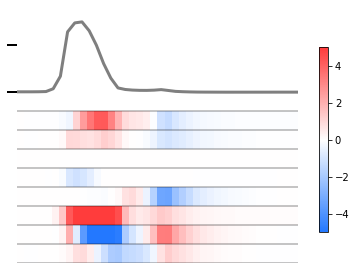

In [10]:
latency_cells = [6]#[0,3,4,6,7,8,9,10,11,12,14,15,16]
intensities = [1.5]

response = np.zeros(40)
tot_integrad = np.zeros([8,40])

interval=400


for i in range( len(intensities) ):
    ax = plt.subplot(111)   
    #Set line width of axes
    ax.spines["top"].set_linewidth(0)    
    ax.spines["bottom"].set_linewidth(0)    
    ax.spines["right"].set_linewidth(0)    
    ax.spines["left"].set_linewidth(0) 
    ax.tick_params(axis="both", which="both", bottom="off", top="off",    
    labelbottom="on", left="off", right="off", labelleft="off",direction='out',length=10,width=1.5,pad=8,labelsize=20)


    
    
    # Turn on/off axes, ticks, change width, labelsize
    ax.tick_params(axis="both", which="both", bottom=False, top=False,
                   labelbottom=False, left=True, right=False,
                   labelleft=False,direction='out',length=10,width=2.0,pad=10,labelsize=20)
    
    for j in latency_cells:
        outfile_integrad = './analysis_data/'+model_n_path+'/latency_coding/integrad_chan_'+str(j)+'_intensity_'+str(np.round_(intensities[i],decimals=1))+'_steps_'+str(integ_steps)+'.npy'
        outfile_response = './analysis_data/'+model_n_path+'/latency_coding/response_chan_'+str(j)+'_intensity_'+str(np.round_(intensities[i],decimals=1))+'_steps_'+str(integ_steps)+'.npy'

        response += np.load(outfile_response)[:,0]
        integrad = np.load(outfile_integrad)
        ex_in = np.sum(integrad,axis=(0,2,3))
        

        tot_integrad += np.sum(integrad[:,:,:,:],  axis=(2,3)).T
    tot_integrad = tot_integrad/len(latency_cells)
    #plt.imshow( tot_integrad, cmap='bwr', vmin=-np.max(np.abs(tot_integrad)), vmax=np.max(np.abs(tot_integrad)), )
    xlabel='Time (s)'
    #plt.xlabel(xlabel,size=25)
    
    x = np.linspace(0,interval/1000,interval)
    plt.imshow(tot_integrad, cmap=mycmap, vmin=-5, vmax=5, extent=[x[0],x[-1],8,0],aspect=0.027)
    plt.plot(np.linspace(0,0.4,40), -0.5*response-1, color=plt.cm.tab10(7), lw=3)
    
    for y in range(0,9):
        plt.plot(np.linspace(0,0.5,100),np.zeros(100)+y, c='k', alpha=0.3)
    plt.yticks(np.arange(-6.000000001, -0, step=2.5)) 
    plt.colorbar(shrink=0.75)
    plt.ylim(8,-5)
    plt.xlim(0,0.4)
    plt.tight_layout()
    #plt.savefig('latency_coding.pdf')
    plt.show()

# Excitatory v.s. Inhibitory

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


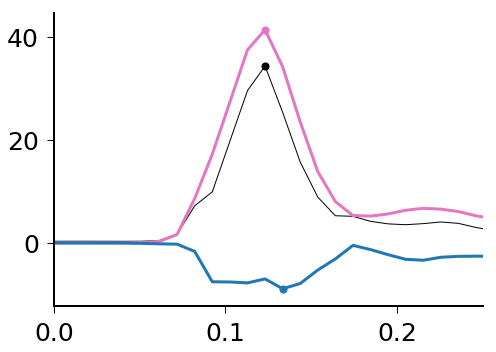

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
No handles with labels found to put in legend.


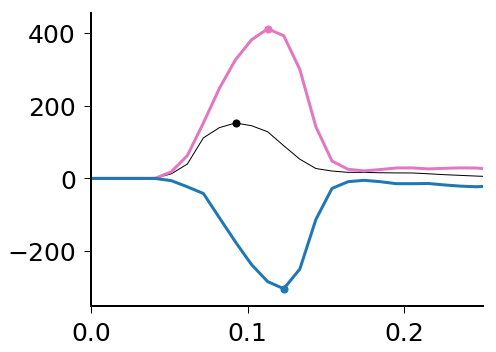

In [7]:
integ_steps = 100

latency_cells = [0,3,4,6,7,8,9,10,11,12,14,15,16]
intensities = [0.3,1.5]

response = np.zeros(40)
ex_integrad = np.zeros(40)
in_integrad = np.zeros(40)

for i in range( len(intensities) ):
    for j in latency_cells:
        outfile_integrad = './analysis_data/'+model_n_path+'/latency_coding/integrad_chan_'+str(j)+'_intensity_'+str(np.round_(intensities[i],decimals=1))+'_steps_'+str(integ_steps)+'.npy'
        outfile_response = './analysis_data/'+model_n_path+'/latency_coding/response_chan_'+str(j)+'_intensity_'+str(np.round_(intensities[i],decimals=1))+'_steps_'+str(integ_steps)+'.npy'

        response += np.load(outfile_response)[:,0]
        integrad = np.load(outfile_integrad)
        ex_in = np.sum(integrad,axis=(0,2,3))
        

        ex_integrad += np.sum(integrad[:,ex_in>0,:,:],  axis=(1,2,3))
        in_integrad += np.sum(integrad[:,ex_in<0,:,:],  axis=(1,2,3))
                
    fig, ax = plt.subplots(1, 1, figsize=(7,5))
    # Set line width of axes
    ax.spines["top"].set_linewidth(0)
    ax.spines["bottom"].set_linewidth(2)
    ax.spines["right"].set_linewidth(0)
    ax.spines["left"].set_linewidth(2)

    # Turn on/off axes, ticks, change width, labelsize
    ax.tick_params(axis="both", which="both", bottom=True, top=False,
                   labelbottom=True, left=True, right=False,
                   labelleft=True,direction='out',length=7,width=1.0,pad=8,labelsize=25)
        
    plt.plot(np.linspace(0,0.4,40), response, c='k', ls='-', alpha=1,  lw=1, label='')
    plt.scatter( np.linspace(0,0.4,40)[np.argmax(response)], np.max(response), c='k', alpha=1, s=50 )

    plt.plot(np.linspace(0,0.4,40), ex_integrad, lw=3, label='', c=plt.cm.tab10(6))
    plt.scatter( np.linspace(0,0.4,40)[np.argmax(ex_integrad)], np.max(ex_integrad), c=plt.cm.tab10(6), alpha=1, s=50 )
    
    plt.plot(np.linspace(0,0.4,40), in_integrad , lw=3, label='', c=plt.cm.tab10(0))
    plt.scatter( np.linspace(0,0.4,40)[np.argmin(in_integrad)], np.min(in_integrad), c=plt.cm.tab10(0), alpha=1, s=50 )
    #plt.xlabel('time [s]', size=20)
    
    if i==0:
        plt.yticks(np.arange(0, 50, step=20))
    plt.xticks(np.arange(0, 2, step=0.1))
    plt.xlim(0,0.25)
    #plt.ylim(-10, 50)
    #plt.xlabel('Time (s)', size=30)
    #plt.ylabel('Rate (Hz)', size=30)
    plt.tight_layout()
    #plt.savefig('./Latency_ON_OFF_ratio.pdf')
    
    
    #plt.title('ganglion: '+str(j)+', peak: '+str(np.argmax(response))+', peak off: '+str(np.argmax(np.sum(off_integrad, axis=(1,2,3)))), size=20)
    plt.legend(fontsize=17,frameon=False)
    plt.tight_layout()
    #.savefig('./Journal_Figures/Excitatory_vs_Inhibitory_Intensity'+str(i)+'.pdf')
    plt.show()

# Inhibitory ON v.s. OFF

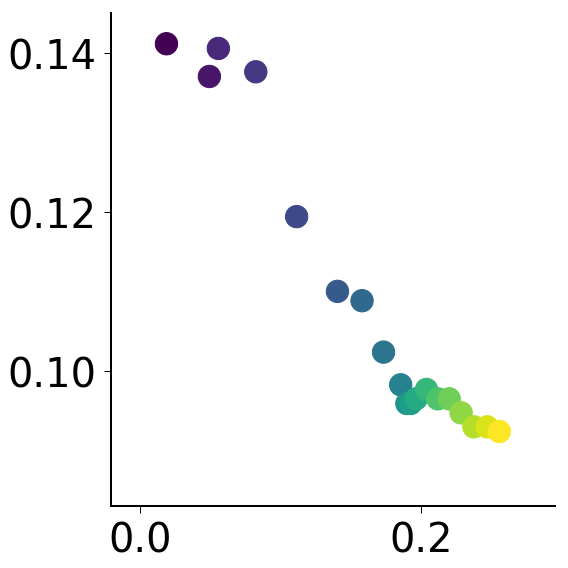

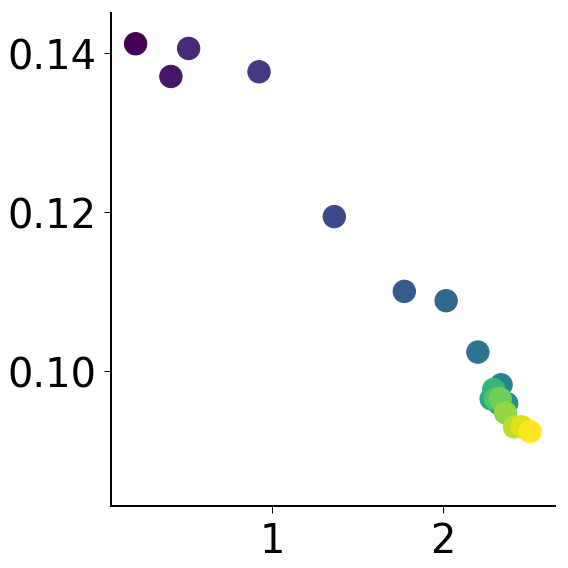

In [6]:
# Analysis

# determine if a neuron is ON or OFF
on_off = np.zeros(8)
for i in range(8):
    filters = torch.sum(model_n.sequential[0].weight[i],(1,2)).cpu().detach().numpy()
    amax = 15+ np.argmax( np.abs(filters[15:]))
    on_off[i] = np.sign(filters[amax])



intensities = np.arange(0.0,2.0,0.1)

peaks       = np.zeros( [len(intensities),n_chans] )
frac_array_on  = np.zeros( [len(intensities),n_chans] )
frac_array_off  = np.zeros( [len(intensities),n_chans] )
integ_steps = 100

for j in range( n_chans ):
    for i in range( len(intensities) ):
        outfile_integrad = './analysis_data/'+model_n_path+'/latency_coding/integrad_chan_'+str(j)+'_intensity_'+str(np.round_(intensities[i],decimals=2))+'_steps_'+str(integ_steps)+'.npy'
        outfile_response = './analysis_data/'+model_n_path+'/latency_coding/response_chan_'+str(j)+'_intensity_'+str(np.round_(intensities[i],decimals=2))+'_steps_'+str(integ_steps)+'.npy'

        response = np.load(outfile_response)
        integrad = np.load(outfile_integrad)
        
        ex_in = np.sign( np.sum(integrad, axis=(0,2,3)) )

        peaks[i,j]      = np.argmax(response)
        
        att = np.sum(integrad, axis=(0,2,3))
        off = -(np.sum(att[ (on_off<0)*(ex_in<0)])) 
        on =  -np.sum(att[(on_off>0)*(ex_in<0)])
        
        frac_array_off[i,j] = off/np.sum(response) 
        frac_array_on[i,j] = on/np.sum(response)
        
        
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Set line width of axes
ax.spines["top"].set_linewidth(0)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(0)
ax.spines["left"].set_linewidth(2)

# Turn on/off axes, ticks, change width, labelsize
ax.tick_params(axis="both", which="both", bottom=True, top=False,
               labelbottom=True, left=True, right=False,
               labelleft=True,direction='out',length=7,width=1.0,pad=8,labelsize=40)
plt.scatter(np.mean(frac_array_on, axis=1)[1:], np.mean(peaks, axis=1)[1:]/100, s=500, c=np.arange(len(np.mean(peaks, axis=1)[1:])))
plt.yticks(np.arange(0.1, 0.151, step=0.02)) 
plt.ylim(0.083, 0.145)
#plt.xlabel('Inhibitory ON (Hz)', size=35)
#plt.ylabel('Latency (s)', size=35)
plt.tight_layout()
plt.savefig('./Journal_Figures/Latency_Inhibitory_ON_contributions.pdf')



fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# Set line width of axes
ax.spines["top"].set_linewidth(0)
ax.spines["bottom"].set_linewidth(2)
ax.spines["right"].set_linewidth(0)
ax.spines["left"].set_linewidth(2)

# Turn on/off axes, ticks, change width, labelsize
ax.tick_params(axis="both", which="both", bottom=True, top=False,
               labelbottom=True, left=True, right=False,
               labelleft=True,direction='out',length=7,width=1.0,pad=8,labelsize=40)
plt.scatter(np.mean(frac_array_off, axis=1)[1:], np.mean(peaks, axis=1)[1:]/100, s=500, c=np.arange(len(np.mean(peaks, axis=1)[1:])))
plt.yticks(np.arange(0.1, 0.151, step=0.02)) 
plt.ylim(0.083, 0.145)
#plt.xlabel('Inhibitory OFF (Hz)', size=35)
#plt.ylabel('Latency (s)', size=35)
plt.tight_layout()
#plt.savefig('./Journal_Figures/Latency_Inhibitory_OFF_contributions.pdf')